# Deep Learning based Generative human pitch model from text


The below models that are trained are [Tacotron](https://github.com/Emotional-Text-to-Speech/tacotron_pytorch) and [DC-TTS](https://github.com/Emotional-Text-to-Speech/pytorch-dc-tts).



## Downloading the necessary libraries
## Installing the dependences
##Gathering the trained data





In [ ]:
! git clone https://github.com/Emotional-Text-to-Speech/pytorch-dc-tts
! git clone --recursive https://github.com/Emotional-Text-to-Speech/tacotron_pytorch.git
! cd "tacotron_pytorch/" && pip install -e .
! pip install unidecode
! pip install gdown
! mkdir trained_models

import gdown
url = 'https://drive.google.com/uc?id=1rmhtEl3N3kAfnQM6J0vDGSCCHlHLK6kw'
output = 'trained_models/angry_dctts.pth'
gdown.download(url, output, quiet=False)
url = 'https://drive.google.com/uc?id=1bP0eJ6z4onr2klolzU17Y8SaNspxQjF-'
output = 'trained_models/neutral_dctts.pth'
gdown.download(url, output, quiet=False)
url = 'https://drive.google.com/uc?id=1WWE9zxS3FRgD0Y5yIdNmLY9-t5gnBsNt'
output = 'trained_models/ssrn.pth'
gdown.download(url, output, quiet=False)
url = 'https://drive.google.com/uc?id=1N6Ykrd1IaPiNdos_iv0J6JbY2gBDghod'
output = 'trained_models/disgust_tacotron.pth'
gdown.download(url, output, quiet=False)
url = 'https://drive.google.com/uc?id=15m0PZ8xaBocb_6wDjAU6S4Aunbr3TKkM'
output = 'trained_models/amused_tacotron.pth'
gdown.download(url, output, quiet=False)
url = 'https://drive.google.com/uc?id=1D6HGWYWvhdvLWQt4uOYqdmuVO7ZVLWNa'
output = 'trained_models/sleepiness_tacotron.pth'
gdown.download(url, output, quiet=False)

Cloning into 'pytorch-dc-tts'...
remote: Enumerating objects: 319, done.
remote: Counting objects: 100% (319/319), done.
remote: Compressing objects: 100% (261/261), done.
remote: Total 1904 (delta 91), reused 274 (delta 58), pack-reused 1585
Receiving objects: 100% (1904/1904), 277.56 MiB | 11.95 MiB/s, done.
Resolving deltas: 100% (226/226), done.
Cloning into 'tacotron_pytorch'...
remote: Enumerating objects: 150, done.
remote: Total 150 (delta 0), reused 0 (delta 0), pack-reused 150
Receiving objects: 100% (150/150), 21.19 MiB | 8.04 MiB/s, done.
Resolving deltas: 100% (71/71), done.
Submodule 'lib/tacotron' (https://github.com/r9y9/tacotron) registered for path 'lib/tacotron'
Cloning into '/content/tacotron_pytorch/lib/tacotron'...
remote: Enumerating objects: 212, done.        
remote: Total 212 (delta 0), reused 0 (delta 0), pack-reused 212        
Receiving objects: 100% (212/212), 62.01 KiB | 174.00 KiB/s, done.
Resolving deltas: 100% (111/111), done.
Submodule path 'lib/tacot

Downloading...
From: https://drive.google.com/uc?id=1rmhtEl3N3kAfnQM6J0vDGSCCHlHLK6kw
To: /content/trained_models/angry_dctts.pth
288MB [00:01, 166MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bP0eJ6z4onr2klolzU17Y8SaNspxQjF-
To: /content/trained_models/neutral_dctts.pth
95.9MB [00:00, 108MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1WWE9zxS3FRgD0Y5yIdNmLY9-t5gnBsNt
To: /content/trained_models/ssrn.pth
331MB [00:02, 130MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N6Ykrd1IaPiNdos_iv0J6JbY2gBDghod
To: /content/trained_models/disgust_tacotron.pth
68.3MB [00:00, 91.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=15m0PZ8xaBocb_6wDjAU6S4Aunbr3TKkM
To: /content/trained_models/amused_tacotron.pth
68.3MB [00:00, 70.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1D6HGWYWvhdvLWQt4uOYqdmuVO7ZVLWNa
To: /content/trained_models/sleepiness_tacotron.pth
68.3MB [00:01, 36.5MB/s]


'trained_models/sleepiness_tacotron.pth'

In [ ]:
%tensorflow_version 1.x 
%pylab inline
rcParams["figure.figsize"] = (10,5)

import os
import sys
import numpy as np
sys.path.append('pytorch-dc-tts/')
sys.path.append('pytorch-dc-tts/models')
sys.path.append("tacotron_pytorch/")
sys.path.append("tacotron_pytorch/lib/tacotron")

# For the Deep Convolutional network-Text To Speech
import torch
from text2mel import Text2Mel
from ssrn import SSRN
from audio import save_to_wav, spectrogram2wav
from utils import get_last_checkpoint_file_name, load_checkpoint_test, save_to_png, load_checkpoint
from datasets.emovdb import vocab, get_test_data

# For the Tacotron
from text import text_to_sequence, symbols
# from util import audio

from tacotron_pytorch import Tacotron
from synthesis import tts as _tts

# For Audio/Display purposes
import librosa.display
import IPython
from IPython.display import Audio
from IPython.display import display
from google.colab import widgets
from google.colab import output
import warnings
warnings.filterwarnings('ignore')


torch.set_grad_enabled(False)
text2mel = Text2Mel(vocab).eval()

ssrn = SSRN().eval()
load_checkpoint('trained_models/ssrn.pth', ssrn, None)

model = Tacotron(n_vocab=len(symbols),
                 embedding_dim=256,
                 mel_dim=80,
                 linear_dim=1025,
                 r=5,
                 padding_idx=None,
                 use_memory_mask=False,
                 )

def visualize(alignment, spectrogram, Emotion):
    label_fontsize = 16
    tb = widgets.TabBar(['Alignment', 'Spectrogram'], location='top')
    with tb.output_to('Alignment'):
      imshow(alignment.T, aspect="auto", origin="lower", interpolation=None)
      xlabel("Decoder timestamp", fontsize=label_fontsize)
      ylabel("Encoder timestamp", fontsize=label_fontsize)
    with tb.output_to('Spectrogram'):
      if Emotion == 'Disgust' or Emotion == 'Amused' or Emotion == 'Sleepiness':
        librosa.display.specshow(spectrogram.T, sr=fs,hop_length=hop_length, x_axis="time", y_axis="linear")
      else:
        librosa.display.specshow(spectrogram, sr=fs,hop_length=hop_length, x_axis="time", y_axis="linear")

      xlabel("Time", fontsize=label_fontsize)
      ylabel("Hz", fontsize=label_fontsize)

def tts_dctts(text2mel, ssrn, text):
  sentences = [text]

  max_N = len(text)
  L = torch.from_numpy(get_test_data(sentences, max_N))
  zeros = torch.from_numpy(np.zeros((1, 80, 1), np.float32))
  Y = zeros
  A = None

  for t in range(210):
      _, Y_t, A = text2mel(L, Y, monotonic_attention=True)
      Y = torch.cat((zeros, Y_t), -1)
      _, attention = torch.max(A[0, :, -1], 0)
      attention = attention.item()
      if L[0, attention] == vocab.index('E'):  # EOS
          break

  _, Z = ssrn(Y)
  Y = Y.cpu().detach().numpy()
  A = A.cpu().detach().numpy()
  Z = Z.cpu().detach().numpy()

  return spectrogram2wav(Z[0, :, :].T), A[0, :, :], Y[0, :, :]


def tts_tacotron(model, text):
    waveform, alignment, spectrogram = _tts(model, text)
    return waveform, alignment, spectrogram 

def present(waveform, Emotion, figures=False):
  if figures!=False:
        visualize(figures[0], figures[1], Emotion)
  IPython.display.display(Audio(waveform, rate=fs))

  
fs = 20000 #20000
hop_length = 250
model.decoder.max_decoder_steps = 200

TensorFlow 1.x selected.
Populating the interactive namespace from numpy and matplotlib
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

trained_models/ssrn.pth
loaded checkpoint epoch=0 step=0


## Demo waveform and speech generation

- Select an ```Emotion``` from the dropdown and enter the ```Text``` that you want to be generated. 

**Play the speech with the generated audio player and view the required plots by clicking on their respective tabs!**




Populating the interactive namespace from numpy and matplotlib
Warning! doesn't seems to be converged


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

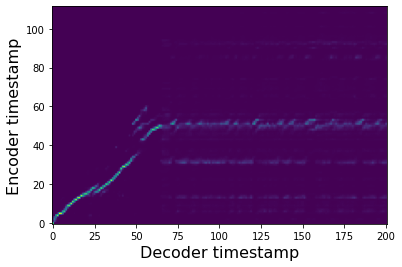

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

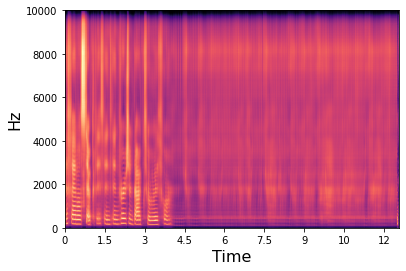

<IPython.core.display.Javascript object>

In [ ]:
#@title Select the emotion and type the text

%pylab inline

Emotion = "Sleepiness" #@param ["Neutral", "Angry", "Disgust", "Sleepiness", "Amused"]
Text = 'The final step is inversion back to audio waveform from these spectrograms in which the frequency domain signal' #@param {type:"string"}

wav, align, mel = None, None, None

if Emotion == "Neutral":
  load_checkpoint('trained_models/'+Emotion.lower()+'_dctts.pth', text2mel, None)
  wav, align, mel = tts_dctts(text2mel, ssrn, Text)
elif Emotion == "Angry":
  load_checkpoint_test('trained_models/'+Emotion.lower()+'_dctts.pth', text2mel, None)
  wav, align, mel = tts_dctts(text2mel, ssrn, Text)
  # wav = wav.T
elif Emotion == "Disgust" or Emotion == "Amused" or Emotion == "Sleepiness":
  checkpoint = torch.load('trained_models/'+Emotion.lower()+'_tacotron.pth', map_location=torch.device('cpu'))
  model.load_state_dict(checkpoint["state_dict"])
  wav, align, mel = tts_tacotron(model, Text)

present(wav, Emotion, (align,mel))

